<a href="https://colab.research.google.com/github/Sreelakshmi2023/MachineLearningProjects2023/blob/main/Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [1]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

importing face mask dataset

In [2]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 94% 153M/163M [00:01<00:00, 107MB/s] 
100% 163M/163M [00:01<00:00, 92.7MB/s]


In [3]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The DATASET is extracted')

The DATASET is extracted


In [4]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Import the required Dependencies

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # visualize our images
import cv2 # image procssing
from google.colab.patches import cv2_imshow #
from PIL import Image
from sklearn.model_selection import train_test_split



In [6]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1664.jpg', 'with_mask_4.jpg', 'with_mask_3048.jpg', 'with_mask_3160.jpg', 'with_mask_1059.jpg']
['with_mask_1449.jpg', 'with_mask_2273.jpg', 'with_mask_2034.jpg', 'with_mask_300.jpg', 'with_mask_764.jpg']


In [7]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2217.jpg', 'without_mask_2900.jpg', 'without_mask_446.jpg', 'without_mask_1501.jpg', 'without_mask_2554.jpg']
['without_mask_3131.jpg', 'without_mask_252.jpg', 'without_mask_823.jpg', 'without_mask_1135.jpg', 'without_mask_3218.jpg']


In [9]:
# number of elements in with mask images and without mask images
print('Number of with mask_images:',len(with_mask_files))
print('Number of without mask images:',len(without_mask_files));

Number of with mask_images: 3725
Number of without mask images: 3828


create labels for two class of images

# with_mask --> 1
# without_mask -->0

In [10]:
#create the labels
with_mask_labels=[1]*3725

without_mask_labels=[0]*3828

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels=with_mask_labels+without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

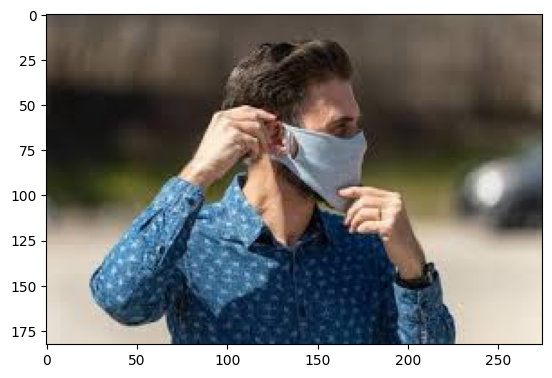

In [14]:
# displaying with mask image
img=mpimg.imread('/content/data/with_mask/with_mask_2590.jpg')
imgplot=plt.imshow(img)
plt.show()

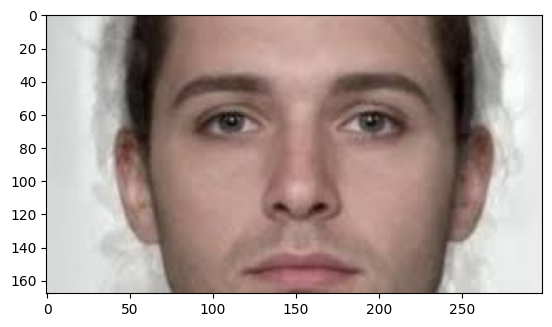

In [16]:
# displaying with mask image
img=mpimg.imread('/content/data/without_mask/without_mask_2217.jpg')
imgplot=plt.imshow(img)
plt.show()

Image processing


1. Resize The Images
2. Convert the images to numpy arrays


In [20]:
#convert images to numpy arrays

with_mask_path='/content/data/with_mask/'

data=[]

for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)





without_mask_path='/content/data/without_mask/'


for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
type(data)

list

In [21]:
len(data)


7553

In [23]:
data[0]

array([[[235, 169, 165],
        [237, 172, 168],
        [238, 177, 172],
        ...,
        [243, 233, 232],
        [240, 230, 229],
        [227, 217, 216]],

       [[237, 174, 169],
        [238, 177, 172],
        [240, 181, 175],
        ...,
        [242, 232, 231],
        [239, 229, 228],
        [220, 210, 209]],

       [[240, 180, 175],
        [243, 185, 178],
        [244, 188, 181],
        ...,
        [240, 230, 229],
        [240, 230, 229],
        [242, 232, 231]],

       ...,

       [[106,  72,  79],
        [112,  74,  82],
        [109,  77,  83],
        ...,
        [126,  76,  88],
        [163, 115, 128],
        [235, 202, 206]],

       [[112,  76,  86],
        [103,  71,  80],
        [179, 158, 163],
        ...,
        [127,  78,  93],
        [129,  88, 101],
        [227, 200, 205]],

       [[110,  71,  85],
        [129, 102, 111],
        [241, 230, 234],
        ...,
        [122,  75,  92],
        [111,  77,  91],
        [201, 177, 184]]

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0].shape

(128, 128, 3)

In [27]:
# converting image list and label list to numpy arrays

X=np.array(data)
Y=np.array(labels)

In [28]:
type(X)

numpy.ndarray

In [29]:
print(X.shape)
print(Y.shape)


(7553, 128, 128, 3)
(7553,)


In [30]:
print(Y)

[1 1 1 ... 0 0 0]


Splting data into train test data

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)


In [39]:
print(X_train)

[[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   3]
   [  0   0   3]
   [  0   1   3]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   1]
   [  1   0   1]
   [  1   0   1]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  3   1   1]
   [  4   1   1]
   [  3   0   0]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[215 210 160]
   [249 246 219]
   [251 252 251]
   ...
   [251 253 253]
   [246 246 246]
   [221 220 220]]

  [[220 198 155]
   [244 232 205]
   [249 244 239]
   ...
   [248 248 248]
   [226 226 226]
   [215 214 214]]

  [[219 201 173]
   [245 233 216]
   [255 252 246]
   ...
   [245 246 246]
   [240 240 240]
   [219 218

In [34]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [35]:
#scaling the data

X_train_scaled=X_train/255
X_test_scaled=X_test/255


In [36]:
X_train[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 3],
        [0, 0, 3],
        [0, 1, 3]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 1],
        [1, 0, 1],
        [1, 0, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [3, 1, 1],
        [4, 1, 1],
        [3, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [37]:
X_train_scaled[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.01176471],
        [0.        , 0.        , 0.01176471],
        [0.        , 0.00392157, 0.01176471]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.00392157],
        [0.00392157, 0.        , 0.00392157],
        [0.00392157, 0.        , 0.00392157]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.01176471, 0.00392157, 0.00392157],
        [0.01568627, 0.00392157, 0.00392157],
        [0.01176471, 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

Building the convolutional neural network (CNN)

In [40]:
import tensorflow as tf

In [41]:
from tensorflow import keras

In [44]:
num_of_classes=2

model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))


In [46]:
# compile the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [47]:
#training the neural network
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 [==============================] - 11s 23ms/step - loss: 0.4767 - acc: 0.7977 - val_loss: 0.2608 - val_acc: 0.9041
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2885 - acc: 0.8871 - val_loss: 0.2541 - val_acc: 0.9140
Epoch 3/5
170/170 [==============================] - 3s 20ms/step - loss: 0.2485 - acc: 0.9018 - val_loss: 0.2460 - val_acc: 0.9140
Epoch 4/5
170/170 [==============================] - 4s 23ms/step - loss: 0.2067 - acc: 0.9220 - val_loss: 0.2034 - val_acc: 0.9190
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1768 - acc: 0.9279 - val_loss: 0.1925 - val_acc: 0.9273


Model evalution

In [48]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print('Accuracy=',accuracy)

48/48 [==============================] - 1s 12ms/step - loss: 0.1981 - acc: 0.9206
Accuracy= 0.9205824136734009


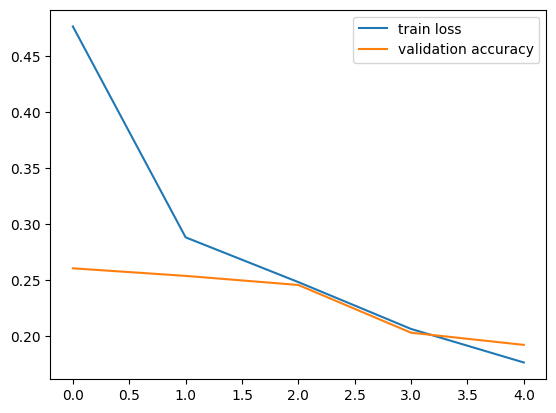

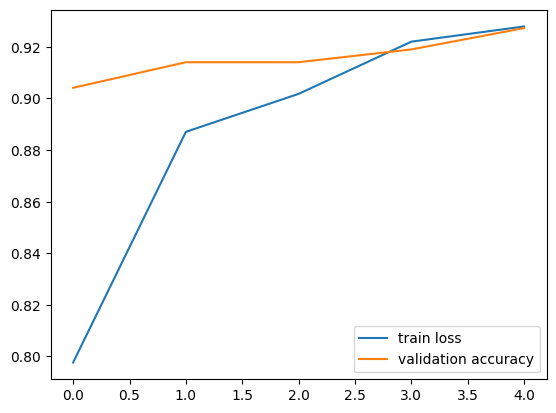

In [49]:
h=history

#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation accuracy')
plt.legend()
plt.show()



#plot the loss value
plt.plot(h.history['acc'],label='train loss')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()





Predictive System

path of the image to be predicted:/content/oooo.png


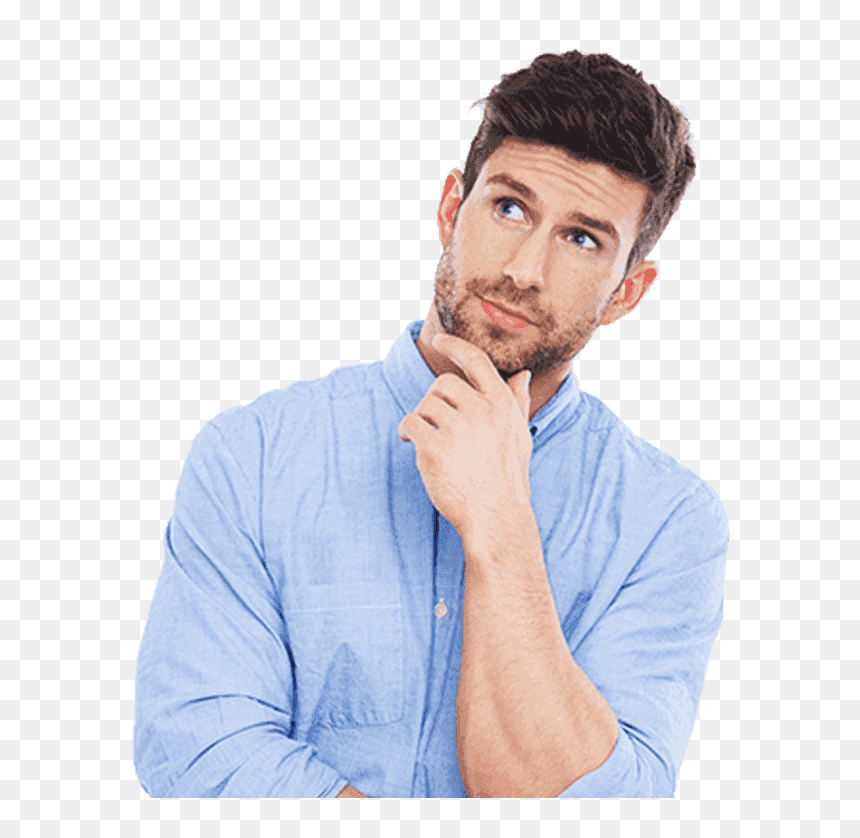

1/1 [==============================] - 0s 19ms/step
[[0.52902335 0.49864525]]
0
the person in the image is not wearing a mask:


In [53]:
input_image_path=input('path of the image to be predicted:')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])

input_prediction=model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label=np.argmax(input_prediction)

print(input_pred_label)
if input_pred_label==1:
  print('the person in the image wearing a mask')
else:
  print('the person in the image is not wearing a mask:')
